In [1]:
#Tamim Mahmud From Daffodil International University
#21/06/2025
#Loss Function
#Gradient Descent
#Backpropagation
#Model Evaluation Metrics





#Loss Function
#👉 Loss function বলে দেই তুমি model train করো ঠিকমতো হচ্ছে কি না।
#এটা একটা সংখ্যা যেটা বোঝায়, "model-এর prediction আর আসল label-এর মধ্যে পার্থক্য কতটা"।

#two types
#1. MSE
#2. Cross Entropy Loss




1. MSE (Mean Squared Error)

📌 যখন: Regression problem হয়

📌 কাজ: predicted value আর actual value-এর পার্থক্যের square নিয়ে average নেয়।

In [2]:
import torch
import torch.nn as nn

y_true = torch.tensor([3.0, 5.0, 2.5])
y_pred = torch.tensor([2.5, 5.3, 2.0])
mse=nn.MSELoss()
loss=mse(y_pred,y_true)
print("MSE Loss : ",loss.item())

MSE Loss :  0.19666671752929688


2. CrossEntropyLoss

📌 যখন: Classification problem হয়

📌 কাজ: তুমি যেই class টা predict করতে চাও, সেই class-এর probability log দিয়ে penalize করে।

In [4]:
import torch
import torch.nn as nn

logits = torch.tensor([[2.0, 1.0, 0.1]])
labels = torch.tensor([0])  # class 0 is true

loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(logits, labels)
print("Cross Entropy Loss:", loss.item())
#🔸 এখানে logits মানে হলো raw score (softmax করার আগের)।
#🔸 CrossEntropyLoss internally softmax + log + negative করে ফেলে।

Cross Entropy Loss: 0.4170299470424652


3. BCELoss (Binary Cross Entropy)

📌 যখন: শুধু 0 বা 1 predict করতে হয়
(binary classification)

📌 Input: sigmoid এর output দিতে হয়।

In [5]:
import torch
import torch.nn as nn

preds = torch.tensor([[0.9], [0.2], [0.7]])  # after sigmoid
labels = torch.tensor([[1.0], [0.0], [1.0]])

loss_fn = nn.BCELoss()
loss = loss_fn(preds, labels)
print("Binary Cross Entropy Loss:", loss.item())


Binary Cross Entropy Loss: 0.22839303314685822


In [7]:
#Model Evaluation Metrics
#Accuracy
#Precision
#Recell
#F1 Score
#Confusion Metrics

🔍 Model Evaluation Metrics (Classification-এর জন্য)

যখন তুমি একটা মডেল ট্রেন করো, তখন কিভাবে বুঝবে সেটি ভালো করছে কিনা? এজন্য কিছু Evaluation Metrics ব্যবহার করা হয়:

#Accuracy: মোট যতগুলো প্রেডিকশন ঠিক হয়েছে তার অনুপাতে সবগুলোর শতাংশ।  Data balanced (positive আর negative sample সমান সমান)

#Precision: মডেল যেসবকে positive বলেছে, তার মধ্যে কতগুলো আসলেই positive ছিল?, False Positive কমাতে চাও (যেমন: Email Spam detection – ভুল করে কোনো জরুরি ইমেইলকে spam বললে সমস্যা)

#Recall(Sensitivity): আসল যতগুলো positive ছিল, তার মধ্যে কতগুলোকে মডেল ঠিকঠাক ধরেছে? , False Negative কমাতে চাও (যেমন: ক্যান্সার ডিটেকশন – ভুলে কাউকে healthy বললে ভয়ানক)

#F1 Score: Precision আর Recall এর harmonic mean , Data imbalance থাকে, তখন F1 বেশি informative

#Confusion Matrix :একটা টেবিল যা দেখায় মডেল কোনটা ঠিক বলেছে, কোনটা ভুল:

In [6]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dummy actual labels (Ground Truth)
y_true = torch.tensor([1, 0, 1, 1, 0, 1, 0, 0])

# Dummy model predictions (Predicted labels)
y_pred = torch.tensor([1, 0, 1, 0, 0, 1, 1, 0])

# Step 1: Convert tensors to numpy for sklearn
y_true_np = y_true.numpy()
y_pred_np = y_pred.numpy()

# Step 2: Calculate Metrics
acc = accuracy_score(y_true_np, y_pred_np)
prec = precision_score(y_true_np, y_pred_np)
rec = recall_score(y_true_np, y_pred_np)
f1 = f1_score(y_true_np, y_pred_np)
cm = confusion_matrix(y_true_np, y_pred_np)

# Step 3: Print Results
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
 [[3 1]
 [1 3]]
Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75


In [8]:
#Gradient Descent


🔥 Gradient Descent কি?

Gradient Descent হলো একটা optimization algorithm — যেটা Loss Function কমিয়ে মডেলের weight update করার জন্য ব্যবহৃত হয়।


তুমি ভাবতে পারো এটা এমন এক টেকনিক যা একটা পাহাড় বেয়ে নিচে নামার মতো — যেখানে লক্ষ্য হলো সর্বনিম্ন (minimum loss) পয়েন্টে পৌঁছানো।

Epoch 001 | Loss: 5223.4136 | w: 5.5805 | b: 1.9833
Epoch 021 | Loss: 2.3404 | w: 20.8973 | b: 6.4893
Epoch 041 | Loss: 1.9508 | w: 20.9034 | b: 6.7372
Epoch 061 | Loss: 1.7037 | w: 20.8445 | b: 6.9509
Epoch 081 | Loss: 1.4878 | w: 20.7892 | b: 7.1506
Epoch 101 | Loss: 1.2993 | w: 20.7375 | b: 7.3372
Epoch 121 | Loss: 1.1347 | w: 20.6892 | b: 7.5116
Epoch 141 | Loss: 0.9910 | w: 20.6441 | b: 7.6746
Epoch 161 | Loss: 0.8654 | w: 20.6019 | b: 7.8269
Epoch 181 | Loss: 0.7558 | w: 20.5625 | b: 7.9692
Epoch 200 | Loss: 0.6645 | w: 20.5274 | b: 8.0958


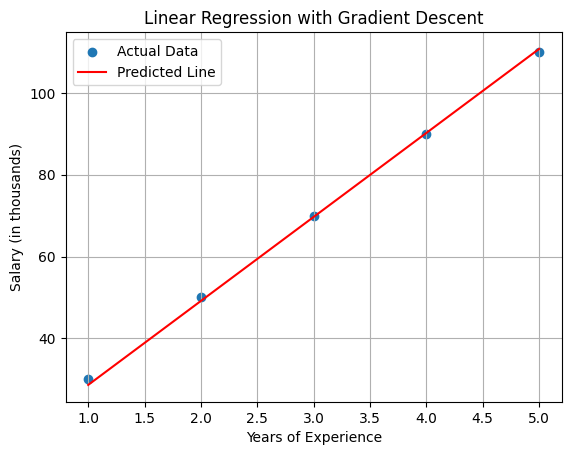

In [10]:
import torch
import matplotlib.pyplot as plt

# 🎯 Step 1: Dummy Dataset (Experience vs Salary)
X = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]])
y = torch.tensor([[30.0], [50.0], [70.0], [90.0], [110.0]])  # Salary in thousands

# Step 2: Initialize weights & bias
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Step 3: Set learning rate & epochs
lr = 0.01
epochs = 200

# Step 4: Training Loop
for epoch in range(epochs):
    # Prediction: y_pred = w*x + b
    y_pred = X * w + b

    # MSE Loss: mean squared error
    loss = torch.mean((y - y_pred) ** 2)

    # Backward pass (calculate gradients)
    loss.backward()

    # Update weights
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # Clear gradients for next step
    w.grad.zero_()
    b.grad.zero_()

    # Print progress every 20 epochs
    if epoch % 20 == 0 or epoch == epochs-1:
        print(f"Epoch {epoch+1:03d} | Loss: {loss.item():.4f} | w: {w.item():.4f} | b: {b.item():.4f}")

# Step 5: Plot
with torch.no_grad():
    y_pred = X * w + b  #prediction(Hypothesis)

plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Predicted Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary (in thousands)")
plt.title("Linear Regression with Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
#Backpropagation

Backpropagation হলো:


🔁 Gradient Descent + Chain Rule of Derivatives ➤ যা ব্যবহার করে মডেল শেখে কিভাবে প্রতিটা weight পরিবর্তন করতে হবে, যাতে Loss কমে।

🧮 Backpropagation এর মূল কথা:

“Loss” কতটা হয়েছে, তার দায় কোন weight কতটা বহন করেছে, সেটা বের করে gradient হিসাব করি, তারপর সেই weight-কে adjust করি।

Epoch 001 | Loss: 4563.1909 | w: 4.3035 | b: 1.7125
Epoch 021 | Loss: 68.1702 | w: 18.1950 | b: 6.9930
Epoch 041 | Loss: 59.7070 | w: 17.9149 | b: 8.2545
Epoch 061 | Loss: 52.3959 | w: 17.5933 | b: 9.4167
Epoch 081 | Loss: 46.0111 | w: 17.2925 | b: 10.5028
Epoch 101 | Loss: 40.4352 | w: 17.0114 | b: 11.5177
Epoch 121 | Loss: 35.5658 | w: 16.7487 | b: 12.4662
Epoch 141 | Loss: 31.3133 | w: 16.5032 | b: 13.3525
Epoch 161 | Loss: 27.5995 | w: 16.2737 | b: 14.1808
Epoch 181 | Loss: 24.3562 | w: 16.0593 | b: 14.9548
Epoch 200 | Loss: 21.6565 | w: 15.8687 | b: 15.6432


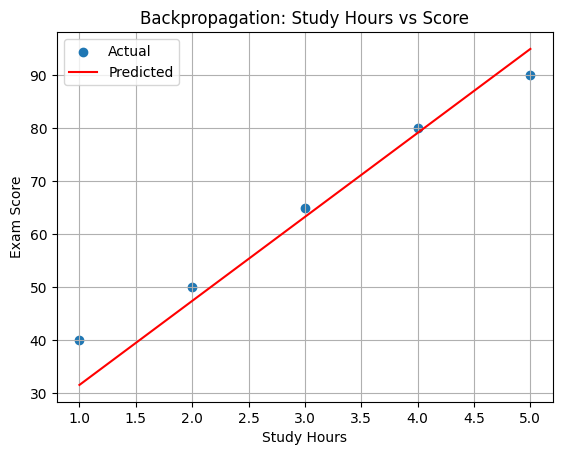

In [12]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Step 1: Data (Study hours vs Exam scores)
X = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]])
y = torch.tensor([[40.0], [50.0], [65.0], [80.0], [90.0]])

# Step 2: Simple 1-layer Neural Network (linear only)
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # 1 input -> 1 output

    def forward(self, x):
        return self.linear(x)

# Step 3: Model, Loss, Optimizer
model = SimpleModel()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Step 4: Training Loop
epochs = 200
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)

    # Compute loss
    loss = loss_fn(y_pred, y)

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()
    optimizer.zero_grad()

    # Print occasionally
    if epoch % 20 == 0 or epoch == epochs - 1:
        [w, b] = list(model.parameters())
        print(f"Epoch {epoch+1:03d} | Loss: {loss.item():.4f} | w: {w.item():.4f} | b: {b.item():.4f}")

# Step 5: Plot results
with torch.no_grad():
    y_pred = model(X)
    plt.scatter(X, y, label='Actual')
    plt.plot(X, y_pred, color='red', label='Predicted')
    plt.xlabel('Study Hours')
    plt.ylabel('Exam Score')
    plt.legend()
    plt.title('Backpropagation: Study Hours vs Score')
    plt.grid(True)
    plt.show()
